In [1]:
import os

os.chdir('./Datasets')

In [2]:
!ls ./BLAST_OUT/XML | wc -l

     201


In [3]:
from Bio.Blast import NCBIXML
from os import listdir
import pandas as pd

def edit_xmltype(path):
    edit = open(path).read().replace("BlastOutput2","BlastXML2")
    open(path,"w").write(edit)

def find_mutations(hsp):
    hsp_mutations = []
    start = hsp.sbjct_start
    for i, (q, s) in enumerate(zip(hsp.query,hsp.sbjct)):
        if q.lower() != s.lower():
            hsp_mutations.append([s,start+i,q])
    return hsp_mutations

pct_identities = []
df = pd.DataFrame(columns=["file","protein","mutations"])
files = listdir("./BLAST_OUT/XML/")[1:]
for i,xml_filename in enumerate(files):
    if xml_filename[-4:]!='.xml':
        print(xml_filename[-4:])
        continue
        
    print(f"Progress: {100*i/len(files):.2f}%",xml_filename,end="\r")
    path_fmt = f"./BLAST_OUT/XML/{xml_filename}"
    edit_xmltype(path_fmt)
    record = NCBIXML.read(open(path_fmt))
    for description,alignment in zip(record.descriptions,record.alignments):
        record_mutations = []
        for hsp in alignment.hsps:
            pct_identity = hsp.identities/hsp.align_length
            pct_identities.append(pct_identity)
            if pct_identity >= 0.95 and pct_identity < 1:
                record_mutations.extend(find_mutations(hsp))
        df.loc[len(df),:] = [xml_filename,description.title,record_mutations]
df["n_mutations"] = df.mutations.apply(lambda x: len(x))

LASTress: 67.16% BLAST_8.xmlll
intsress: 73.63% BLAST_43.xmll


In [6]:
df["n_mutations"] = df.mutations.apply(lambda x: len(x))

In [7]:
df.sort_values(by="n_mutations",ascending=False)

,file,protein,mutations,n_mutations
202,BLAST_171.xml,cds-YP_009724390.1; gene-GU280_gp02; Genbank:Y...,"[[Q, 173, H], [T, 307, P], [D, 614, G], [Q, 67...",41
167,BLAST_172.xml,cds-YP_009724390.1; gene-GU280_gp02; Genbank:Y...,"[[P, 225, S], [L, 229, F], [I, 231, L], [G, 79...",20
262,BLAST_161.xml,cds-YP_009724390.1; gene-GU280_gp02; Genbank:Y...,"[[A, 575, G], [Q, 580, R], [S, 605, F], [S, 87...",16
301,BLAST_162.xml,cds-YP_009724390.1; gene-GU280_gp02; Genbank:Y...,"[[Q, 14, H], [K, 529, N], [S, 530, F], [T, 531...",15
205,BLAST_165.xml,cds-YP_009724390.1; gene-GU280_gp02; Genbank:Y...,"[[K, 77, N], [F, 106, L], [Q, 115, H], [V, 130...",14
...,...,...,...,...
266,BLAST_175.xml,cds-YP_009725295.1; gene-GU280_gp01; Genbank:Y...,[],0
267,BLAST_175.xml,cds-YP_009724389.1; gene-GU280_gp01; Genbank:Y...,[],0
269,BLAST_188.xml,cds-YP_009725295.1; gene-GU280_gp01; Genbank:Y...,[],0
270,BLAST_188.xml,cds-YP_009724389.1; gene-GU280_gp01; Genbank:Y...,[],0


In [8]:
df[df['file'] == "BLAST_171.xml"]

,file,protein,mutations,n_mutations
202,BLAST_171.xml,cds-YP_009724390.1; gene-GU280_gp02; Genbank:Y...,"[[Q, 173, H], [T, 307, P], [D, 614, G], [Q, 67...",41
203,BLAST_171.xml,cds-YP_009725295.1; gene-GU280_gp01; Genbank:Y...,[],0
204,BLAST_171.xml,cds-YP_009724389.1; gene-GU280_gp01; Genbank:Y...,[],0


In [9]:
from itertools import chain
protein_df = pd.DataFrame(df.groupby("protein").n_mutations.sum()).sort_values(by="n_mutations",ascending=False)
protein_df["mutations"] = None
for i,protein in enumerate(protein_df.index):
    protein_mutations = []
    protein_rows = df.loc[df.protein == protein,"mutations"]
    for row in protein_rows:
        protein_mutations.extend(row)
    protein_mutations = ["".join([str(i) for i in protein_mutation]) for protein_mutation in protein_mutations]
    protein_mutations = list(set(protein_mutations))
    protein_df.loc[protein,:] = [protein_df.loc[protein,"n_mutations"],protein_mutations]
protein_df["n_unique_mutations"] = protein_df.mutations.apply(lambda x: len(x))
protein_df["shorthand"] = [i.split(";")[-2] for i in protein_df.index]
protein_df

,n_mutations,mutations,n_unique_mutations,shorthand
protein,,,,
cds-YP_009724390.1; gene-GU280_gp02; Genbank:YP_009724390.1; YP_009724390.1; structural protein; spike protein; CDS; S; GU280_gp02; surface glycoprotein; YP_009724390.1,276,"[V130A, G798A, S605F, K77N, R403K, T208S, D614...",210,surface glycoprotein
cds-YP_009724397.2; gene-GU280_gp10; Genbank:YP_009724397.2; YP_009724397.2; ORF9; structural protein; CDS; N; GU280_gp10; nucleocapsid phosphoprotein; YP_009724397.2,11,"[S187l, P326L, R203k, S202n, A211V, G204r, M210I]",7,nucleocapsid phosphoprotein
cds-YP_009724396.1; gene-GU280_gp09; Genbank:YP_009724396.1; YP_009724396.1; CDS; ORF8; GU280_gp09; ORF8 protein; YP_009724396.1,9,[L84S],1,ORF8 protein
cds-YP_009724389.1; gene-GU280_gp01; Genbank:YP_009724389.1; YP_009724389.1; pp1ab; translated by -1 ribosomal frameshift; ribosomal slippage; CDS; ORF1ab; GU280_gp01; ORF1ab polyprotein; YP_009724389.1,7,"[V1642D, K1571N, P314L, V1615D, L1542V, A1603T]",6,ORF1ab polyprotein
cds-YP_009725295.1; gene-GU280_gp01; Genbank:YP_009725295.1; YP_009725295.1; pp1a; CDS; ORF1ab; GU280_gp01; ORF1a polyprotein; YP_009725295.1,4,"[C4330R, T78X]",2,ORF1a polyprotein
cds-YP_009724393.1; gene-GU280_gp05; Genbank:YP_009724393.1; YP_009724393.1; ORF5; structural protein; CDS; M; GU280_gp05; membrane glycoprotein; YP_009724393.1,2,"[G89R, L57V]",2,membrane glycoprotein
cds-YP_009724394.1; gene-GU280_gp06; Genbank:YP_009724394.1; YP_009724394.1; CDS; ORF6; GU280_gp06; ORF6 protein; YP_009724394.1,1,[E46V],1,ORF6 protein
cds-YP_009724391.1; gene-GU280_gp03; Genbank:YP_009724391.1; YP_009724391.1; CDS; ORF3a; GU280_gp03; ORF3a protein; YP_009724391.1,0,[],0,ORF3a protein
cds-YP_009724392.1; gene-GU280_gp04; Genbank:YP_009724392.1; YP_009724392.1; ORF4; structural protein; E protein; CDS; E; GU280_gp04; envelope protein; YP_009724392.1,0,[],0,envelope protein


<AxesSubplot:ylabel='Count'>

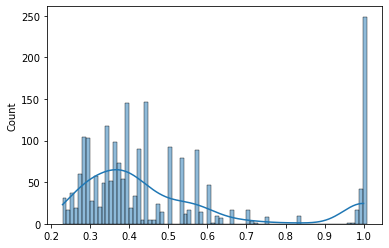

In [10]:
import seaborn as sns
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
sns.histplot(pct_identities,kde=True,binwidth=0.01,ax=ax)

In [11]:
outfile = "./mutation_list.csv"

with open(outfile,"w") as f:
    f.write("PROTEIN,AA1LOCATIONAA2\n")
    for i,row in protein_df.iterrows():
        for mutation in row.mutations:
            f.write(row.shorthand.strip() + "," + mutation +"\n")

In [13]:
mutations_df = pd.DataFrame(columns=["file","protein","aa1","location","aa2","mutation_shorthand"])

protein_counts = {}
files = listdir("./BLAST_OUT/XML/")[1:]
for i,xml_filename in enumerate(files):
    if xml_filename[-4:]!='.xml':
        print(xml_filename[-4:])
        continue
    print(f"Progress: {100*i/len(files):.2f}%",end="\r")
    path_fmt = f"./BLAST_OUT/XML/{xml_filename}"
    edit_xmltype(path_fmt)
    record = NCBIXML.read(open(path_fmt))
    for description,alignment in zip(record.descriptions,record.alignments):
        protein_name = description.title.split(";")[-2].strip()
        try:
            protein_counts[protein_name] += 1
        except:
            protein_counts[protein_name] = 1
        for hsp in alignment.hsps:
            pct_identity = hsp.identities/hsp.align_length
            if pct_identity >= 0.95 and pct_identity < 1:
                for mutation in find_mutations(hsp):
                    mutations_df.loc[len(mutations_df),:] = [xml_filename,protein_name,*mutation,"".join([str(i) for i in mutation])]
mutations_df

LASTress: 67.16%
intsress: 73.63%


,file,protein,aa1,location,aa2,mutation_shorthand
0,BLAST_76.xml,surface glycoprotein,A,829,T,A829T
1,BLAST_62.xml,surface glycoprotein,A,829,T,A829T
2,BLAST_89.xml,nucleocapsid phosphoprotein,S,187,l,S187l
3,BLAST_89.xml,ORF8 protein,L,84,S,L84S
4,BLAST_88.xml,ORF8 protein,L,84,S,L84S
...,...,...,...,...,...,...
305,BLAST_87.xml,ORF8 protein,L,84,S,L84S
306,BLAST_78.xml,surface glycoprotein,A,701,V,A701V
307,BLAST_90.xml,ORF8 protein,L,84,S,L84S
308,BLAST_134.xml,nucleocapsid phosphoprotein,R,203,k,R203k


In [14]:
mutation_freqs_df = pd.DataFrame()
mutation_freqs_df["mutation_shorthand"] = mutations_df.mutation_shorthand.unique()
mutation_freqs_df["aa1"] = mutation_freqs_df.mutation_shorthand.apply(lambda x: x[0])
mutation_freqs_df["aa2"] = mutation_freqs_df.mutation_shorthand.apply(lambda x: x[-1])
mutation_freqs_df["location"] = mutation_freqs_df.mutation_shorthand.apply(lambda x: x[1:-1])
for protein in protein_counts:
    mutation_freqs_df[protein] = None
    protein_df_ = mutations_df.loc[mutations_df.protein == protein,:]
    for i, row in mutation_freqs_df.iterrows():
        protein_mutation_df_ = protein_df_.loc[protein_df_.mutation_shorthand == row.mutation_shorthand,:]
        mutation_freqs_df.loc[i,protein] = len(protein_mutation_df_)/protein_counts[protein]
mutation_freqs_df = mutation_freqs_df.drop(columns=[column for column in mutation_freqs_df.columns[4:] if sum(mutation_freqs_df[column]) == 0])

In [15]:
mutation_freqs_df

,mutation_shorthand,aa1,aa2,location,surface glycoprotein,ORF1a polyprotein,ORF1ab polyprotein,nucleocapsid phosphoprotein,ORF8 protein,membrane glycoprotein,ORF6 protein
0,A829T,A,T,829,0.0934066,0,0,0,0,0,0
1,S187l,S,l,187,0,0,0,0.0188679,0,0,0
2,L84S,L,S,84,0,0,0,0,0.36,0,0
3,D614G,D,G,614,0.131868,0,0,0,0,0,0
4,G496D,G,D,496,0.00549451,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
224,V1642D,V,D,1642,0,0,0.00531915,0,0,0,0
225,E1144Q,E,Q,1144,0.00549451,0,0,0,0,0,0
226,P314L,P,L,314,0,0,0.0106383,0,0,0,0
227,C4330R,C,R,4330,0,0.00515464,0,0,0,0,0


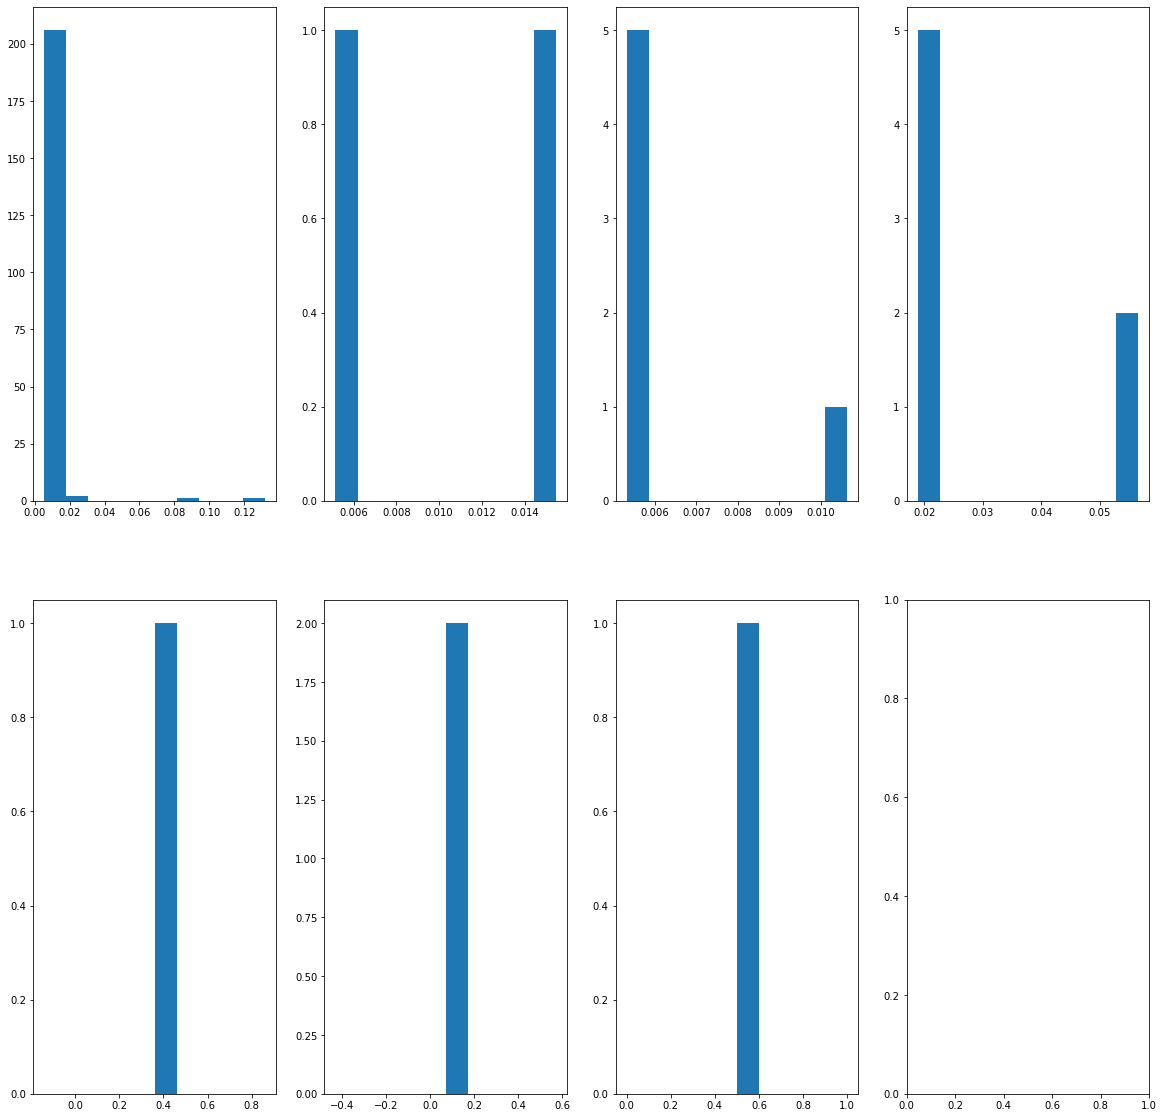

In [16]:
fig, axes = plt.subplots(2,4,figsize=(20,20))
for protein,ax in zip(mutation_freqs_df.columns[4:],axes.flatten()):
    ax.hist(mutation_freqs_df.loc[mutation_freqs_df[protein] > 0,protein])

In [17]:
for protein in mutation_freqs_df.columns[4:]:
    protein_mutation_freqs_df = mutation_freqs_df.loc[mutation_freqs_df[protein] > 0,[*mutation_freqs_df.columns[:4],protein]]
    if len(protein_mutation_freqs_df) > 0:
        display(protein_mutation_freqs_df)
        protein_mutation_freqs_df.to_csv(f"{protein}_freqs.csv")

,mutation_shorthand,aa1,aa2,location,surface glycoprotein
0,A829T,A,T,829,0.0934066
3,D614G,D,G,614,0.131868
4,G496D,G,D,496,0.00549451
5,C291G,C,G,291,0.010989
6,A262T,A,T,262,0.010989
...,...,...,...,...,...
217,V952l,V,l,952,0.00549451
218,S1252f,S,f,1252,0.00549451
219,W152R,W,R,152,0.00549451
225,E1144Q,E,Q,1144,0.00549451


,mutation_shorthand,aa1,aa2,location,ORF1a polyprotein
33,T78X,T,X,78,0.0154639
227,C4330R,C,R,4330,0.00515464


,mutation_shorthand,aa1,aa2,location,ORF1ab polyprotein
220,L1542V,L,V,1542,0.00531915
221,K1571N,K,N,1571,0.00531915
222,A1603T,A,T,1603,0.00531915
223,V1615D,V,D,1615,0.00531915
224,V1642D,V,D,1642,0.00531915
226,P314L,P,L,314,0.0106383


,mutation_shorthand,aa1,aa2,location,nucleocapsid phosphoprotein
1,S187l,S,l,187,0.0188679
34,R203k,R,k,203,0.0566038
35,G204r,G,r,204,0.0566038
36,S202n,S,n,202,0.0188679
163,M210I,M,I,210,0.0188679
164,A211V,A,V,211,0.0188679
165,P326L,P,L,326,0.0188679


,mutation_shorthand,aa1,aa2,location,ORF8 protein
2,L84S,L,S,84,0.36


,mutation_shorthand,aa1,aa2,location,membrane glycoprotein
99,L57V,L,V,57,0.0714286
100,G89R,G,R,89,0.0714286


,mutation_shorthand,aa1,aa2,location,ORF6 protein
101,E46V,E,V,46,0.5


In [18]:
spike_df = mutation_freqs_df.loc[mutation_freqs_df["surface glycoprotein"] > 0, [*mutation_freqs_df.columns[:4],"surface glycoprotein"]]
spike_df.location = spike_df.location.apply(lambda x: int(x))

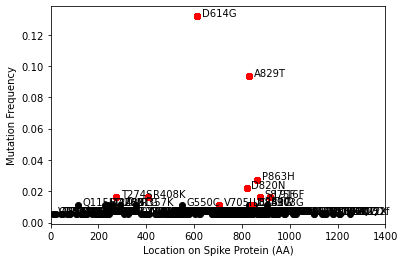

In [19]:
fig, ax = plt.subplots()
ax.scatter(spike_df.location,spike_df["surface glycoprotein"],color="black")
ax.set_xlim(0,1400)
ax.set_xlabel("Location on Spike Protein (AA)")
ax.set_ylabel("Mutation Frequency")
top_muts = spike_df.sort_values(by="surface glycoprotein",ascending=False)
for i,row in top_muts.iterrows():
    plt.text(row.location + 20,row["surface glycoprotein"],row.mutation_shorthand)
    ax.scatter(top_muts.head(10).location,top_muts.head(10)["surface glycoprotein"],color="red")
plt.show()

,mutation_shorthand,aa1,aa2,location,mut_frequency
3,D614G,D,G,614,0.131868
0,A829T,A,T,829,0.0934066
10,P863H,P,H,863,0.0274725
22,D820N,D,N,820,0.021978
104,L916F,L,F,916,0.0164835
...,...,...,...,...,...
81,F802S,F,S,802,0.00549451
82,K811S,K,S,811,0.00549451
83,I834D,I,D,834,0.00549451
84,G838D,G,D,838,0.00549451


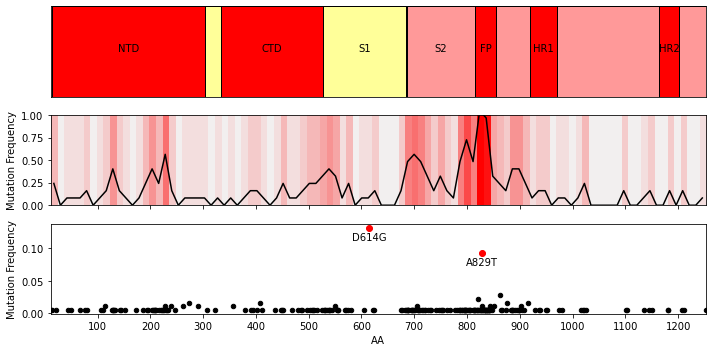

In [20]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import seaborn as sns
plt.rcParams["figure.figsize"] = 10,5

top_muts.rename(columns={"surface glycoprotein":"mut_frequency"},inplace=True)
display(top_muts)
x = top_muts.location.values
y = top_muts.mut_frequency.values
y_ = pd.cut(top_muts.location,bins=100).value_counts(sort=False).values

fig, (ax,ax2,ax3) = plt.subplots(nrows=3, sharex=True)
extent = [min(top_muts.location),max(top_muts.location),0,1]
cmap = sns.light_palette("Red",as_cmap=True)
ax2.imshow(y_[np.newaxis,:], cmap=cmap, aspect="auto", extent=extent)
sns.histplot(top_muts.location,ax=ax2,bins=100,color="k",stat="frequency",fill=False,element="poly")
ax2.set_facecolor((0,0,0,0))
ax2.set_ylim(0,1)
ax2.set_ylabel("Mutation Frequency")

ax3.scatter(x,y,c="k",s=20)
ax3.set_xticks([i*100 for i in range(13)])
ax3.set_ylabel("Mutation Frequency")
ax3.set_xlabel("AA")
sort_ = top_muts.sort_values(by="mut_frequency",ascending=False).head(2)
for i,row in sort_.iterrows():
    plt.text(row.location,row.mut_frequency - 0.02,row.mutation_shorthand,ha="center")
ax3.scatter(sort_.location,sort_.mut_frequency,color="r")

ax.set_xlim(extent[0],extent[1])
ax.set_ylim(extent[2],extent[3])
ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)

ax.add_patch(patches.Rectangle((13,0),672,1,facecolor="#FFFF99",label="S2",edgecolor="k"))
ax.text(606,0.5,"S1",ha="center")
ax.add_patch(patches.Rectangle((686,0),587,1,facecolor="#FF9999",label="S1",edgecolor="k"))
ax.text(751,0.5,"S2",ha="center")

highlight_regions = [[13,303,"NTD"],[334,527,"CTD"],[816,855,"FP"],[920,970,"HR1"],[1163,1202,"HR2"]]
for highlight_region in highlight_regions:
    start,end,lbl = highlight_region
    patch = ax.add_patch(patches.Rectangle((start,0),end-start,1,facecolor="red",label=lbl,edgecolor="k"))
    centerx = start+(end-start)/2
    centery = 0.5
    ax.text(centerx,centery,lbl,ha="center")

plt.tight_layout()
plt.savefig("./multipanel.png",dpi=600)

In [51]:
[NCBIXML.read(open(f"./BLAST_OUT/XML/{xml_filename}")).query.split()[0] for xml_filename in listdir("./BLAST_OUT/XML/")[1:] if xml_filename[-4:]=='.xml']

['MT614354.1',
 'MT729362.1',
 'MT503014.1',
 'MT502991.1',
 'MT503068.1',
 'MT503067.1',
 'MT502993.1',
 'MT503016.1',
 'MT724344.1',
 'MT614352.1',
 'MT936992.1',
 'MT729366.1',
 'pdb|6X2G|F',
 'MT502990.1',
 'MT503013.1',
 'MT502960.1',
 'MT502958.1',
 'MT503012.1',
 'MT502988.1',
 'MT676411.1',
 'MT729372.1',
 'MT729386.1',
 'MT614350.1',
 'MT502985.1',
 'MT502994.1',
 'MT503003.1',
 'MT503006.1',
 'MT502995.1',
 'MT502986.1',
 'MT598153.1',
 'MT729382.1',
 'MT598150.1',
 'MT729379.1',
 'MT875582.1',
 'MT503010.1',
 'MT502998.1',
 'MT598148.1',
 'MT598149.1',
 'MT502996.1',
 'MT503009.1',
 'MT875583.1',
 'MT729380.1',
 'MT598152.1',
 'MW512913.1',
 'MW040520.1',
 'MW055436.1',
 'MT324681.1',
 'MT457389.1',
 'MT111895.1',
 'MT081067.1',
 'MT450426.1',
 'MT232872.1',
 'MW113232.1',
 'MW040521.1',
 'MW512911.1',
 'MW040501.1',
 'MW040527.1',
 'MW040515.1',
 'MT324682.1',
 'MT111896.1',
 'MT127115.1',
 'MT324683.1',
 'MW040514.1',
 'MW040525.1',
 'MW039602.1',
 'MW281571.1',
 'MW040502

In [69]:
def getAccession(xml_filename):
    accession = NCBIXML.read(open(f"./BLAST_OUT/XML/{xml_filename}")).query.split()[0].split('.')[0]
    if accession.startswith("pdb"):
        accession = "_".join(accession.split('|')[1:])
    return accession

In [46]:
geo_df = pd.read_csv("Accession_geo.csv",  index_col = 0)

In [53]:
geo_df.Geo_Location

Accession
MW512911                    Gabon
MW512913                    Gabon
MW512915                    Gabon
MW471658                   Serbia
MW455118                     Iran
                    ...          
MT111896    Australia: Queensland
MT081065          China: HuaShang
MT081067          China: HuaShang
MT042777             China: Wuhan
MT050415                Australia
Name: Geo_Location, Length: 200, dtype: object

In [70]:

df["accessions"] = [getAccession(file) for file in df["file"]]


In [71]:
geo_df.loc["MT111896"].Geo_Location

'Australia: Queensland'

In [72]:
df["location"] = [geo_df.loc[accession].Geo_Location for accession in df["accessions"]]

In [198]:
df

,file,protein,mutations,n_mutations,accessions,location,Collection_Date
0,BLAST_105.xml,cds-YP_009724390.1; gene-GU280_gp02; Genbank:Y...,[],0,MT614354,Italy,3/20
1,BLAST_105.xml,cds-YP_009725295.1; gene-GU280_gp01; Genbank:Y...,[],0,MT614354,Italy,3/20
2,BLAST_105.xml,cds-YP_009724389.1; gene-GU280_gp01; Genbank:Y...,[],0,MT614354,Italy,3/20
3,BLAST_111.xml,cds-YP_009724389.1; gene-GU280_gp01; Genbank:Y...,[],0,MT729362,Mexico: Mexico City,4/20
4,BLAST_111.xml,cds-YP_009725295.1; gene-GU280_gp01; Genbank:Y...,[],0,MT729362,Mexico: Mexico City,4/20
5,BLAST_111.xml,cds-YP_009724390.1; gene-GU280_gp02; Genbank:Y...,[],0,MT729362,Mexico: Mexico City,4/20
6,BLAST_111.xml,cds-YP_009724397.2; gene-GU280_gp10; Genbank:Y...,[],0,MT729362,Mexico: Mexico City,4/20
7,BLAST_76.xml,cds-YP_009724390.1; gene-GU280_gp02; Genbank:Y...,"[[A, 829, T]]",1,MT503014,Thailand,4/20
8,BLAST_76.xml,cds-YP_009724389.1; gene-GU280_gp01; Genbank:Y...,[],0,MT503014,Thailand,4/20
9,BLAST_76.xml,cds-YP_009724391.1; gene-GU280_gp03; Genbank:Y...,[],0,MT503014,Thailand,4/20


In [205]:
df[[str(['D',614,'G']) in str(x) for x in df['mutations']]].sort_values('Collection_Date').to_csv('d614g.csv')

In [212]:
df[['829' in str(x) for x in df['mutations']]].sort_values('Collection_Date')

,file,protein,mutations,n_mutations,accessions,location,Collection_Date
96,BLAST_70.xml,cds-YP_009724390.1; gene-GU280_gp02; Genbank:Y...,"[[A, 829, T]]",1,MT503003,Thailand,3/20
525,BLAST_56.xml,cds-YP_009724390.1; gene-GU280_gp02; Genbank:Y...,"[[A, 829, T]]",1,MT502982,Thailand,3/20
487,BLAST_57.xml,cds-YP_009724390.1; gene-GU280_gp02; Genbank:Y...,"[[A, 829, T]]",1,MT502983,Thailand,3/20
167,BLAST_172.xml,cds-YP_009724390.1; gene-GU280_gp02; Genbank:Y...,"[[P, 225, S], [L, 229, F], [I, 231, L], [G, 79...",20,MW055436,Iran,3/20
143,BLAST_66.xml,cds-YP_009724390.1; gene-GU280_gp02; Genbank:Y...,"[[A, 829, T]]",1,MT502996,Thailand,3/20
133,BLAST_67.xml,cds-YP_009724390.1; gene-GU280_gp02; Genbank:Y...,"[[A, 829, T]]",1,MT502998,Thailand,3/20
129,BLAST_73.xml,cds-YP_009724390.1; gene-GU280_gp02; Genbank:Y...,"[[A, 829, T]]",1,MT503010,Thailand,3/20
108,BLAST_59.xml,cds-YP_009724390.1; gene-GU280_gp02; Genbank:Y...,"[[A, 829, T]]",1,MT502986,Thailand,3/20
583,BLAST_69.xml,cds-YP_009724390.1; gene-GU280_gp02; Genbank:Y...,"[[A, 829, T]]",1,MT503002,Thailand,3/20
92,BLAST_64.xml,cds-YP_009724390.1; gene-GU280_gp02; Genbank:Y...,"[[A, 829, T]]",1,MT502994,Thailand,3/20


In [214]:
df.iloc[167].mutations

[['P', 225, 'S'],
 ['L', 229, 'F'],
 ['I', 231, 'L'],
 ['G', 798, 'C'],
 ['K', 814, 'M'],
 ['R', 815, 'K'],
 ['S', 816, 'T'],
 ['I', 818, 'F'],
 ['D', 820, 'N'],
 ['L', 821, 'R'],
 ['F', 823, 'C'],
 ['V', 826, 'L'],
 ['A', 829, 'E'],
 ['D', 830, 'H'],
 ['I', 834, 'T'],
 ['G', 838, 'A'],
 ['G', 842, 'R'],
 ['D', 843, 'E'],
 ['P', 863, 'H'],
 ['K', 1181, 'Q']]

In [181]:
time_df = pd.read_csv("ACC_time_GEO.csv",  index_col = 0)
time_df = time_df.Collection_Date.apply(lambda x: "/".join(str(x).split('/')[0:3:2] ))
time_df

Accession
MW512911     3/20
MW512913     3/20
MW512915     4/20
MW471658     2/20
MW455118     7/20
MW450960     7/20
MW441315    10/20
MW440431     6/20
MW440434     6/20
MW440435     6/20
MW440437     6/20
MW440440     6/20
MW440441     6/20
7B3B_P        nan
7B3C_P        nan
7ACT_B        nan
MW397519    10/20
MW368451     4/20
MW368452     4/20
MW368453     4/20
MW368454     4/20
MW368456     2/20
MW368457     2/20
MW368460     2/20
MT724343     4/20
MT724344     4/20
MW292549     4/20
MW292557     4/20
MW281571     8/20
MT263143     2/20
MT263144     2/20
MT263148     2/20
MW113232     5/20
MW055436     3/20
MW040510     4/20
MW040511     4/20
MW040512     4/20
MW040514     4/20
MW040515     3/20
MW040520     3/20
MW040521     3/20
MW040523     3/20
MW040524     3/20
MW040525     4/20
MW040527     4/20
MW040501     5/20
MW040502     5/20
MW039449     3/20
MW039533     3/20
MW039602     4/20
7AAP_P        nan
MT843231     2/20
MT843232     2/20
MT843235    12/19
MT843238     2/20


In [186]:

df= df.merge(time_df,left_on="accessions", right_on="Accession")

In [187]:
df.sort_values("n_mutations", ascending = False)

,file,protein,mutations,n_mutations,accessions,location,Collection_Date
202,BLAST_171.xml,cds-YP_009724390.1; gene-GU280_gp02; Genbank:Y...,"[[Q, 173, H], [T, 307, P], [D, 614, G], [Q, 67...",41,MW040527,Iran,4/20
167,BLAST_172.xml,cds-YP_009724390.1; gene-GU280_gp02; Genbank:Y...,"[[P, 225, S], [L, 229, F], [I, 231, L], [G, 79...",20,MW055436,Iran,3/20
262,BLAST_161.xml,cds-YP_009724390.1; gene-GU280_gp02; Genbank:Y...,"[[A, 575, G], [Q, 580, R], [S, 605, F], [S, 87...",16,MW040510,Iran,4/20
301,BLAST_162.xml,cds-YP_009724390.1; gene-GU280_gp02; Genbank:Y...,"[[Q, 14, H], [K, 529, N], [S, 530, F], [T, 531...",15,MW040511,Iran,4/20
205,BLAST_165.xml,cds-YP_009724390.1; gene-GU280_gp02; Genbank:Y...,"[[K, 77, N], [F, 106, L], [Q, 115, H], [V, 130...",14,MW040515,Iran,3/20
229,BLAST_170.xml,cds-YP_009724390.1; gene-GU280_gp02; Genbank:Y...,"[[K, 187, Q], [H, 207, L], [T, 208, S], [Y, 38...",13,MW040525,Iran,4/20
409,BLAST_168.xml,cds-YP_009724390.1; gene-GU280_gp02; Genbank:Y...,"[[V, 130, A], [F, 194, Y], [N, 196, D], [Y, 20...",11,MW040523,Iran,3/20
434,BLAST_156.xml,cds-YP_009724390.1; gene-GU280_gp02; Genbank:Y...,"[[D, 111, N], [Q, 115, H], [Q, 134, T], [G, 14...",9,MW039449,Iran,3/20
340,BLAST_191.xml,cds-YP_009724390.1; gene-GU280_gp02; Genbank:Y...,"[[D, 80, Y], [T, 240, S], [R, 246, I], [G, 550...",8,MW440437,Iran,6/20
164,BLAST_166.xml,cds-YP_009724390.1; gene-GU280_gp02; Genbank:Y...,"[[A, 262, T], [K, 835, N], [L, 841, I], [D, 84...",8,MW040520,Iran,3/20


In [140]:
[True,False,True,False] and [True,True,False,False]

[True, True, False, False]

In [150]:
df

,file,protein,mutations,n_mutations,accessions,location
0,BLAST_105.xml,cds-YP_009724390.1; gene-GU280_gp02; Genbank:Y...,[],0,MT614354,Italy
1,BLAST_105.xml,cds-YP_009725295.1; gene-GU280_gp01; Genbank:Y...,[],0,MT614354,Italy
2,BLAST_105.xml,cds-YP_009724389.1; gene-GU280_gp01; Genbank:Y...,[],0,MT614354,Italy
3,BLAST_111.xml,cds-YP_009724389.1; gene-GU280_gp01; Genbank:Y...,[],0,MT729362,Mexico: Mexico City
4,BLAST_111.xml,cds-YP_009725295.1; gene-GU280_gp01; Genbank:Y...,[],0,MT729362,Mexico: Mexico City
5,BLAST_111.xml,cds-YP_009724390.1; gene-GU280_gp02; Genbank:Y...,[],0,MT729362,Mexico: Mexico City
6,BLAST_111.xml,cds-YP_009724397.2; gene-GU280_gp10; Genbank:Y...,[],0,MT729362,Mexico: Mexico City
7,BLAST_76.xml,cds-YP_009724390.1; gene-GU280_gp02; Genbank:Y...,"[[A, 829, T]]",1,MT503014,Thailand
8,BLAST_76.xml,cds-YP_009724389.1; gene-GU280_gp01; Genbank:Y...,[],0,MT503014,Thailand
9,BLAST_76.xml,cds-YP_009724391.1; gene-GU280_gp03; Genbank:Y...,[],0,MT503014,Thailand


In [145]:
spkike_df = df[[('surface glycoprotein' in x ) for x in df.protein]].set_index('accessions')
spkike_df = spkike_df[spkike_df.n_mutations>0]
spkike_df

,file,protein,mutations,n_mutations,location
accessions,,,,,
MT503014,BLAST_76.xml,cds-YP_009724390.1; gene-GU280_gp02; Genbank:Y...,"[[A, 829, T]]",1,Thailand
MT502991,BLAST_62.xml,cds-YP_009724390.1; gene-GU280_gp02; Genbank:Y...,"[[A, 829, T]]",1,Thailand
MT502993,BLAST_63.xml,cds-YP_009724390.1; gene-GU280_gp02; Genbank:Y...,"[[A, 829, T]]",1,Thailand
MT503016,BLAST_77.xml,cds-YP_009724390.1; gene-GU280_gp02; Genbank:Y...,"[[D, 614, G]]",1,Thailand
MT724344,BLAST_110.xml,cds-YP_009724390.1; gene-GU280_gp02; Genbank:Y...,"[[G, 496, D], [D, 614, G]]",2,USA
MT936992,BLAST_138.xml,cds-YP_009724390.1; gene-GU280_gp02; Genbank:Y...,"[[C, 291, G]]",1,Iraq
MT502990,BLAST_61.xml,cds-YP_009724390.1; gene-GU280_gp02; Genbank:Y...,"[[A, 829, T]]",1,Thailand
MT503013,BLAST_75.xml,cds-YP_009724390.1; gene-GU280_gp02; Genbank:Y...,"[[D, 614, G]]",1,Thailand
MT503012,BLAST_74.xml,cds-YP_009724390.1; gene-GU280_gp02; Genbank:Y...,"[[A, 829, T]]",1,Thailand


In [129]:
for x in df.protein.unique():
    print(x.split(';')[-2])
    print()

 surface glycoprotein

 ORF1a polyprotein

 ORF1ab polyprotein

 nucleocapsid phosphoprotein

 ORF3a protein

 ORF8 protein

 ORF10 protein

 envelope protein

 membrane glycoprotein

 ORF6 protein

 ORF7a protein

 ORF7b



In [185]:
df

,file,protein,mutations,n_mutations,accessions,location
0,BLAST_105.xml,cds-YP_009724390.1; gene-GU280_gp02; Genbank:Y...,[],0,MT614354,Italy
1,BLAST_105.xml,cds-YP_009725295.1; gene-GU280_gp01; Genbank:Y...,[],0,MT614354,Italy
2,BLAST_105.xml,cds-YP_009724389.1; gene-GU280_gp01; Genbank:Y...,[],0,MT614354,Italy
3,BLAST_111.xml,cds-YP_009724389.1; gene-GU280_gp01; Genbank:Y...,[],0,MT729362,Mexico: Mexico City
4,BLAST_111.xml,cds-YP_009725295.1; gene-GU280_gp01; Genbank:Y...,[],0,MT729362,Mexico: Mexico City
5,BLAST_111.xml,cds-YP_009724390.1; gene-GU280_gp02; Genbank:Y...,[],0,MT729362,Mexico: Mexico City
6,BLAST_111.xml,cds-YP_009724397.2; gene-GU280_gp10; Genbank:Y...,[],0,MT729362,Mexico: Mexico City
7,BLAST_76.xml,cds-YP_009724390.1; gene-GU280_gp02; Genbank:Y...,"[[A, 829, T]]",1,MT503014,Thailand
8,BLAST_76.xml,cds-YP_009724389.1; gene-GU280_gp01; Genbank:Y...,[],0,MT503014,Thailand
9,BLAST_76.xml,cds-YP_009724391.1; gene-GU280_gp03; Genbank:Y...,[],0,MT503014,Thailand


In [193]:
# Chaning the branch labels to include the heaader descriptions of genomes

full_genome_tree= '../phylo/phylotree.txt'

tree_handle = open(full_genome_tree,'r')
tree = tree_handle.read()
tree_handle.close()

# with open('../week7/headers') as headers:
#     for header in headers.readlines():
#         id = header[1:].split()[0]
#         tree = tree.replace(id," ".join(header[1:].split(',')[:-1]))
visited = set()
for _,row in df.iterrows():
    
    if row.n_mutations==0:
        mut = ''
    else:
        mut = " ".join(["".join([mutation[0],str(mutation[1]),mutation[2]]) for mutation in row.mutations])
    id = row.accessions
    if id in visited:
        tree = tree.replace(id, " ".join([id,mut]))
    else:
        visited.add(id)
        prot= ''
        if 'surface glycoprotein' in row.protein.split(';')[-2]:
            prot = 'SPIKE'
        id_to_replace = id
        if id.startswith('M'):
            id_to_replace += '.1'

        tree = tree.replace(id_to_replace, " ".join([id, mut,str(row.location).split(':')[0],row.Collection_Date,prot]))

# tree
print(tree)
# ann_tree = open('../week7/RAxML_bipartitions.scored.annotated','w')
# ann_tree.write(tree)
# ann_tree.close()

(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
(
MT344135   L1542V K1571N A1603T V1615D V1642D Nigeria 4/20 :0.09112,
MT373161    Italy 4/20 :-0.09112)
:0.04146,
MT843231    Italy 2/20 :-0.04146)
:0.02296,
MT843232    Italy 2/20 :-0.02296)
:0.01162,
MT843235    Italy 12/19 :-0.01162)
:0.00583,
MT843238    Italy 2/20 :-0.00583)
:0.00294,
MT843239    Italy 2/20 :-0.00294)
:0.02690,
pdb|7AAP|P:-0.01388)
:0.01095,
MT042777    China 1/20 :-0.01746)
:0.01436,
(
MW471658     Serbia 2/20 :-0.01699,
(
(
(
MW441315     France 10/20 :-0.02911,
(
(
MT502976    P314L Thailand 4/20 :0.00000,
MT502965    P314L Thailand 3/20 :0.00000)
:0.00019,
(
(
(
(
(
MT502963     Thailand 3/20 :0.00000,
(
(
(
(
(
(
(
MT502945     Thailand 3/20 :0.00000,
(
(
(
MT502944     Thailand 3/20 :0.00000,
MT502951     Thailand 3/20 :0.00000)
:0.00000,
MT502970     Thailand 3/20 :0.00000)
:0.00000,
MT502972     Th

In [146]:
mutations_to_loc = dict()
for i in np.array(df):
    mutations,location = i[-4],i[-1]
    for mutation in mutations:
        
        
        mutation = "".join([mutation[0],str(mutation[1]),mutation[2]])
        if mutation in mutations_to_loc.keys():
            mutations_to_loc[mutation].append(location)
        else:
            mutations_to_loc[mutation] = [location]
        
print(mutations_to_loc)

{'A829T': ['Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand', 'Thailand'], 'S187l': ['Thailand'], 'L84S': ['Thailand', 'Thailand', 'Thailand', 'Thailand', 'China', 'Thailand', 'Thailand', 'Thailand', 'Thailand'], 'D614G': ['Thailand', 'USA', 'Thailand', 'Bangladesh', 'Thailand', 'Thailand', 'Thailand', 'Gabon', 'Gabon', 'Venezuela', 'Iran', 'Iran', 'Iran', 'Venezuela', 'China: Hebei, Shijiazhuang', 'Gabon', 'Iran', 'China: Hebei, Shijiazhuang', 'China: Hebei, Shijiazhuang', 'Serbia', 'Iran', 'Serbia', 'China: Hebei, Shijiazhuang', 'Iraq: Kuedistan region, Erbil'], 'G496D': ['USA'], 'C291G': ['Iraq', 'Iraq'], 'A262T': ['Iran', 'Iran'], 'K835N': ['Iran'], 'L841I': ['Iran'], 'D843G': ['Iran', 'Iran'], 'P863H': ['Iran', 'Iran', 'Iran', 'Iran', 'Iran'], 'A1015T': ['Iran'], 'S1021P': ['Iran'], 'A1026P': ['Iran'], 'P225S': ['Iran'], 'L229F': ['Iran'], 'I

In [147]:
mutations_to_loc["D614G"].count('Iran')

5

In [148]:
locations = df["location"].unique()
mutations = list(mutations_to_loc.keys())

mut_loc_df = pd.DataFrame(index = mutations, columns = locations)
for mutation in mutations:
    for location in locations:
        print(mutation,location,mutations_to_loc[mutation].count(location))
        mut_loc_df.at[mutation,location]=mutations_to_loc[mutation].count(location)
        print(mut_loc_df.at[mutation,location])

A829T Italy 0
0
A829T Mexico: Mexico City 0
0
A829T Thailand 17
17
A829T USA 0
0
A829T Iraq 0
0
A829T Mexico: Mexico State 0
0
A829T Bangladesh 0
0
A829T Iran 0
0
A829T Iraq: Kuedistan region, Erbil 0
0
A829T Gabon 0
0
A829T Tunisia 0
0
A829T Italy: Palermo 0
0
A829T Australia: Queensland 0
0
A829T China: HuaShang 0
0
A829T Venezuela 0
0
A829T Viet Nam 0
0
A829T Brazil 0
0
A829T Australia 0
0
A829T China: Hebei, Shijiazhuang 0
0
A829T Iran: Qum 0
0
A829T China: Wuhan 0
0
A829T Iran: Tehran 0
0
A829T Russia: Moscow 0
0
A829T China 0
0
A829T Serbia 0
0
A829T Nigeria 0
0
A829T France 0
0
A829T Mexico: Morelos 0
0
A829T Italy: Turin 0
0
A829T nan 0
0
A829T India 0
0
A829T Italy: Rome 0
0
A829T Italy: Milan 0
0
S187l Italy 0
0
S187l Mexico: Mexico City 0
0
S187l Thailand 1
1
S187l USA 0
0
S187l Iraq 0
0
S187l Mexico: Mexico State 0
0
S187l Bangladesh 0
0
S187l Iran 0
0
S187l Iraq: Kuedistan region, Erbil 0
0
S187l Gabon 0
0
S187l Tunisia 0
0
S187l Italy: Palermo 0
0
S187l Australia: Queensl

S1021P Serbia 0
0
S1021P Nigeria 0
0
S1021P France 0
0
S1021P Mexico: Morelos 0
0
S1021P Italy: Turin 0
0
S1021P nan 0
0
S1021P India 0
0
S1021P Italy: Rome 0
0
S1021P Italy: Milan 0
0
A1026P Italy 0
0
A1026P Mexico: Mexico City 0
0
A1026P Thailand 0
0
A1026P USA 0
0
A1026P Iraq 0
0
A1026P Mexico: Mexico State 0
0
A1026P Bangladesh 0
0
A1026P Iran 1
1
A1026P Iraq: Kuedistan region, Erbil 0
0
A1026P Gabon 0
0
A1026P Tunisia 0
0
A1026P Italy: Palermo 0
0
A1026P Australia: Queensland 0
0
A1026P China: HuaShang 0
0
A1026P Venezuela 0
0
A1026P Viet Nam 0
0
A1026P Brazil 0
0
A1026P Australia 0
0
A1026P China: Hebei, Shijiazhuang 0
0
A1026P Iran: Qum 0
0
A1026P China: Wuhan 0
0
A1026P Iran: Tehran 0
0
A1026P Russia: Moscow 0
0
A1026P China 0
0
A1026P Serbia 0
0
A1026P Nigeria 0
0
A1026P France 0
0
A1026P Mexico: Morelos 0
0
A1026P Italy: Turin 0
0
A1026P nan 0
0
A1026P India 0
0
A1026P Italy: Rome 0
0
A1026P Italy: Milan 0
0
P225S Italy 0
0
P225S Mexico: Mexico City 0
0
P225S Thailand 0
0
P22

G204r Viet Nam 0
0
G204r Brazil 0
0
G204r Australia 0
0
G204r China: Hebei, Shijiazhuang 0
0
G204r Iran: Qum 0
0
G204r China: Wuhan 0
0
G204r Iran: Tehran 0
0
G204r Russia: Moscow 1
1
G204r China 1
1
G204r Serbia 0
0
G204r Nigeria 0
0
G204r France 0
0
G204r Mexico: Morelos 0
0
G204r Italy: Turin 0
0
G204r nan 0
0
G204r India 0
0
G204r Italy: Rome 0
0
G204r Italy: Milan 0
0
S202n Italy 0
0
S202n Mexico: Mexico City 0
0
S202n Thailand 0
0
S202n USA 0
0
S202n Iraq 0
0
S202n Mexico: Mexico State 0
0
S202n Bangladesh 0
0
S202n Iran 0
0
S202n Iraq: Kuedistan region, Erbil 0
0
S202n Gabon 0
0
S202n Tunisia 0
0
S202n Italy: Palermo 0
0
S202n Australia: Queensland 0
0
S202n China: HuaShang 1
1
S202n Venezuela 0
0
S202n Viet Nam 0
0
S202n Brazil 0
0
S202n Australia 0
0
S202n China: Hebei, Shijiazhuang 0
0
S202n Iran: Qum 0
0
S202n China: Wuhan 0
0
S202n Iran: Tehran 0
0
S202n Russia: Moscow 0
0
S202n China 0
0
S202n Serbia 0
0
S202n Nigeria 0
0
S202n France 0
0
S202n Mexico: Morelos 0
0
S202n It

G700V Bangladesh 0
0
G700V Iran 1
1
G700V Iraq: Kuedistan region, Erbil 0
0
G700V Gabon 0
0
G700V Tunisia 0
0
G700V Italy: Palermo 0
0
G700V Australia: Queensland 0
0
G700V China: HuaShang 0
0
G700V Venezuela 0
0
G700V Viet Nam 0
0
G700V Brazil 0
0
G700V Australia 0
0
G700V China: Hebei, Shijiazhuang 0
0
G700V Iran: Qum 0
0
G700V China: Wuhan 0
0
G700V Iran: Tehran 0
0
G700V Russia: Moscow 0
0
G700V China 0
0
G700V Serbia 0
0
G700V Nigeria 0
0
G700V France 0
0
G700V Mexico: Morelos 0
0
G700V Italy: Turin 0
0
G700V nan 0
0
G700V India 0
0
G700V Italy: Rome 0
0
G700V Italy: Milan 0
0
Y707N Italy 0
0
Y707N Mexico: Mexico City 0
0
Y707N Thailand 0
0
Y707N USA 0
0
Y707N Iraq 0
0
Y707N Mexico: Mexico State 0
0
Y707N Bangladesh 0
0
Y707N Iran 1
1
Y707N Iraq: Kuedistan region, Erbil 0
0
Y707N Gabon 0
0
Y707N Tunisia 0
0
Y707N Italy: Palermo 0
0
Y707N Australia: Queensland 0
0
Y707N China: HuaShang 0
0
Y707N Venezuela 0
0
Y707N Viet Nam 0
0
Y707N Brazil 0
0
Y707N Australia 0
0
Y707N China: Hebe

0
G798A India 0
0
G798A Italy: Rome 0
0
G798A Italy: Milan 0
0
F802S Italy 0
0
F802S Mexico: Mexico City 0
0
F802S Thailand 0
0
F802S USA 0
0
F802S Iraq 0
0
F802S Mexico: Mexico State 0
0
F802S Bangladesh 0
0
F802S Iran 1
1
F802S Iraq: Kuedistan region, Erbil 0
0
F802S Gabon 0
0
F802S Tunisia 0
0
F802S Italy: Palermo 0
0
F802S Australia: Queensland 0
0
F802S China: HuaShang 0
0
F802S Venezuela 0
0
F802S Viet Nam 0
0
F802S Brazil 0
0
F802S Australia 0
0
F802S China: Hebei, Shijiazhuang 0
0
F802S Iran: Qum 0
0
F802S China: Wuhan 0
0
F802S Iran: Tehran 0
0
F802S Russia: Moscow 0
0
F802S China 0
0
F802S Serbia 0
0
F802S Nigeria 0
0
F802S France 0
0
F802S Mexico: Morelos 0
0
F802S Italy: Turin 0
0
F802S nan 0
0
F802S India 0
0
F802S Italy: Rome 0
0
F802S Italy: Milan 0
0
K811S Italy 0
0
K811S Mexico: Mexico City 0
0
K811S Thailand 0
0
K811S USA 0
0
K811S Iraq 0
0
K811S Mexico: Mexico State 0
0
K811S Bangladesh 0
0
K811S Iran 1
1
K811S Iraq: Kuedistan region, Erbil 0
0
K811S Gabon 0
0
K811S 

T791I China: Wuhan 0
0
T791I Iran: Tehran 0
0
T791I Russia: Moscow 0
0
T791I China 0
0
T791I Serbia 0
0
T791I Nigeria 0
0
T791I France 0
0
T791I Mexico: Morelos 0
0
T791I Italy: Turin 0
0
T791I nan 0
0
T791I India 0
0
T791I Italy: Rome 0
0
T791I Italy: Milan 0
0
L916F Italy 0
0
L916F Mexico: Mexico City 0
0
L916F Thailand 0
0
L916F USA 0
0
L916F Iraq 0
0
L916F Mexico: Mexico State 0
0
L916F Bangladesh 0
0
L916F Iran 3
3
L916F Iraq: Kuedistan region, Erbil 0
0
L916F Gabon 0
0
L916F Tunisia 0
0
L916F Italy: Palermo 0
0
L916F Australia: Queensland 0
0
L916F China: HuaShang 0
0
L916F Venezuela 0
0
L916F Viet Nam 0
0
L916F Brazil 0
0
L916F Australia 0
0
L916F China: Hebei, Shijiazhuang 0
0
L916F Iran: Qum 0
0
L916F China: Wuhan 0
0
L916F Iran: Tehran 0
0
L916F Russia: Moscow 0
0
L916F China 0
0
L916F Serbia 0
0
L916F Nigeria 0
0
L916F France 0
0
L916F Mexico: Morelos 0
0
L916F Italy: Turin 0
0
L916F nan 0
0
L916F India 0
0
L916F Italy: Rome 0
0
L916F Italy: Milan 0
0
N928D Italy 0
0
N928D M

0
P621R Bangladesh 0
0
P621R Iran 1
1
P621R Iraq: Kuedistan region, Erbil 0
0
P621R Gabon 0
0
P621R Tunisia 0
0
P621R Italy: Palermo 0
0
P621R Australia: Queensland 0
0
P621R China: HuaShang 0
0
P621R Venezuela 0
0
P621R Viet Nam 0
0
P621R Brazil 0
0
P621R Australia 0
0
P621R China: Hebei, Shijiazhuang 0
0
P621R Iran: Qum 0
0
P621R China: Wuhan 0
0
P621R Iran: Tehran 0
0
P621R Russia: Moscow 0
0
P621R China 0
0
P621R Serbia 0
0
P621R Nigeria 0
0
P621R France 0
0
P621R Mexico: Morelos 0
0
P621R Italy: Turin 0
0
P621R nan 0
0
P621R India 0
0
P621R Italy: Rome 0
0
P621R Italy: Milan 0
0
A623D Italy 0
0
A623D Mexico: Mexico City 0
0
A623D Thailand 0
0
A623D USA 0
0
A623D Iraq 0
0
A623D Mexico: Mexico State 0
0
A623D Bangladesh 0
0
A623D Iran 1
1
A623D Iraq: Kuedistan region, Erbil 0
0
A623D Gabon 0
0
A623D Tunisia 0
0
A623D Italy: Palermo 0
0
A623D Australia: Queensland 0
0
A623D China: HuaShang 0
0
A623D Venezuela 0
0
A623D Viet Nam 0
0
A623D Brazil 0
0
A623D Australia 0
0
A623D China: He

T240S China 0
0
T240S Serbia 0
0
T240S Nigeria 0
0
T240S France 0
0
T240S Mexico: Morelos 0
0
T240S Italy: Turin 0
0
T240S nan 0
0
T240S India 0
0
T240S Italy: Rome 0
0
T240S Italy: Milan 0
0
G550C Italy 0
0
G550C Mexico: Mexico City 0
0
G550C Thailand 0
0
G550C USA 0
0
G550C Iraq 0
0
G550C Mexico: Mexico State 0
0
G550C Bangladesh 0
0
G550C Iran 2
2
G550C Iraq: Kuedistan region, Erbil 0
0
G550C Gabon 0
0
G550C Tunisia 0
0
G550C Italy: Palermo 0
0
G550C Australia: Queensland 0
0
G550C China: HuaShang 0
0
G550C Venezuela 0
0
G550C Viet Nam 0
0
G550C Brazil 0
0
G550C Australia 0
0
G550C China: Hebei, Shijiazhuang 0
0
G550C Iran: Qum 0
0
G550C China: Wuhan 0
0
G550C Iran: Tehran 0
0
G550C Russia: Moscow 0
0
G550C China 0
0
G550C Serbia 0
0
G550C Nigeria 0
0
G550C France 0
0
G550C Mexico: Morelos 0
0
G550C Italy: Turin 0
0
G550C nan 0
0
G550C India 0
0
G550C Italy: Rome 0
0
G550C Italy: Milan 0
0
D796N Italy 0
0
D796N Mexico: Mexico City 0
0
D796N Thailand 0
0
D796N USA 0
0
D796N Iraq 0
0


L865F Venezuela 0
0
L865F Viet Nam 0
0
L865F Brazil 0
0
L865F Australia 0
0
L865F China: Hebei, Shijiazhuang 0
0
L865F Iran: Qum 0
0
L865F China: Wuhan 0
0
L865F Iran: Tehran 0
0
L865F Russia: Moscow 0
0
L865F China 0
0
L865F Serbia 0
0
L865F Nigeria 0
0
L865F France 0
0
L865F Mexico: Morelos 0
0
L865F Italy: Turin 0
0
L865F nan 0
0
L865F India 0
0
L865F Italy: Rome 0
0
L865F Italy: Milan 0
0
A899G Italy 0
0
A899G Mexico: Mexico City 0
0
A899G Thailand 0
0
A899G USA 0
0
A899G Iraq 0
0
A899G Mexico: Mexico State 0
0
A899G Bangladesh 0
0
A899G Iran 1
1
A899G Iraq: Kuedistan region, Erbil 0
0
A899G Gabon 0
0
A899G Tunisia 0
0
A899G Italy: Palermo 0
0
A899G Australia: Queensland 0
0
A899G China: HuaShang 0
0
A899G Venezuela 0
0
A899G Viet Nam 0
0
A899G Brazil 0
0
A899G Australia 0
0
A899G China: Hebei, Shijiazhuang 0
0
A899G Iran: Qum 0
0
A899G China: Wuhan 0
0
A899G Iran: Tehran 0
0
A899G Russia: Moscow 0
0
A899G China 0
0
A899G Serbia 0
0
A899G Nigeria 0
0
A899G France 0
0
A899G Mexico: 

1
C391G Mexico: Mexico State 0
0
C391G Bangladesh 0
0
C391G Iran 0
0
C391G Iraq: Kuedistan region, Erbil 0
0
C391G Gabon 0
0
C391G Tunisia 0
0
C391G Italy: Palermo 0
0
C391G Australia: Queensland 0
0
C391G China: HuaShang 0
0
C391G Venezuela 0
0
C391G Viet Nam 0
0
C391G Brazil 0
0
C391G Australia 0
0
C391G China: Hebei, Shijiazhuang 0
0
C391G Iran: Qum 0
0
C391G China: Wuhan 0
0
C391G Iran: Tehran 0
0
C391G Russia: Moscow 0
0
C391G China 0
0
C391G Serbia 0
0
C391G Nigeria 0
0
C391G France 0
0
C391G Mexico: Morelos 0
0
C391G Italy: Turin 0
0
C391G nan 0
0
C391G India 0
0
C391G Italy: Rome 0
0
C391G Italy: Milan 0
0
N394K Italy 0
0
N394K Mexico: Mexico City 0
0
N394K Thailand 0
0
N394K USA 0
0
N394K Iraq 1
1
N394K Mexico: Mexico State 0
0
N394K Bangladesh 0
0
N394K Iran 0
0
N394K Iraq: Kuedistan region, Erbil 0
0
N394K Gabon 0
0
N394K Tunisia 0
0
N394K Italy: Palermo 0
0
N394K Australia: Queensland 0
0
N394K China: HuaShang 0
0
N394K Venezuela 0
0
N394K Viet Nam 0
0
N394K Brazil 0
0
N394

N540K Brazil 0
0
N540K Australia 0
0
N540K China: Hebei, Shijiazhuang 0
0
N540K Iran: Qum 0
0
N540K China: Wuhan 0
0
N540K Iran: Tehran 0
0
N540K Russia: Moscow 0
0
N540K China 0
0
N540K Serbia 0
0
N540K Nigeria 0
0
N540K France 0
0
N540K Mexico: Morelos 0
0
N540K Italy: Turin 0
0
N540K nan 0
0
N540K India 0
0
N540K Italy: Rome 0
0
N540K Italy: Milan 0
0
T866P Italy 0
0
T866P Mexico: Mexico City 0
0
T866P Thailand 0
0
T866P USA 0
0
T866P Iraq 0
0
T866P Mexico: Mexico State 0
0
T866P Bangladesh 0
0
T866P Iran 1
1
T866P Iraq: Kuedistan region, Erbil 0
0
T866P Gabon 0
0
T866P Tunisia 0
0
T866P Italy: Palermo 0
0
T866P Australia: Queensland 0
0
T866P China: HuaShang 0
0
T866P Venezuela 0
0
T866P Viet Nam 0
0
T866P Brazil 0
0
T866P Australia 0
0
T866P China: Hebei, Shijiazhuang 0
0
T866P Iran: Qum 0
0
T866P China: Wuhan 0
0
T866P Iran: Tehran 0
0
T866P Russia: Moscow 0
0
T866P China 0
0
T866P Serbia 0
0
T866P Nigeria 0
0
T866P France 0
0
T866P Mexico: Morelos 0
0
T866P Italy: Turin 0
0
T866

V952l Iran 1
1
V952l Iraq: Kuedistan region, Erbil 0
0
V952l Gabon 0
0
V952l Tunisia 0
0
V952l Italy: Palermo 0
0
V952l Australia: Queensland 0
0
V952l China: HuaShang 0
0
V952l Venezuela 0
0
V952l Viet Nam 0
0
V952l Brazil 0
0
V952l Australia 0
0
V952l China: Hebei, Shijiazhuang 0
0
V952l Iran: Qum 0
0
V952l China: Wuhan 0
0
V952l Iran: Tehran 0
0
V952l Russia: Moscow 0
0
V952l China 0
0
V952l Serbia 0
0
V952l Nigeria 0
0
V952l France 0
0
V952l Mexico: Morelos 0
0
V952l Italy: Turin 0
0
V952l nan 0
0
V952l India 0
0
V952l Italy: Rome 0
0
V952l Italy: Milan 0
0
S1252f Italy 0
0
S1252f Mexico: Mexico City 0
0
S1252f Thailand 0
0
S1252f USA 0
0
S1252f Iraq 0
0
S1252f Mexico: Mexico State 0
0
S1252f Bangladesh 0
0
S1252f Iran 0
0
S1252f Iraq: Kuedistan region, Erbil 0
0
S1252f Gabon 0
0
S1252f Tunisia 0
0
S1252f Italy: Palermo 0
0
S1252f Australia: Queensland 0
0
S1252f China: HuaShang 0
0
S1252f Venezuela 0
0
S1252f Viet Nam 0
0
S1252f Brazil 0
0
S1252f Australia 0
0
S1252f China: Hebei,

A701V Iran: Qum 0
0
A701V China: Wuhan 0
0
A701V Iran: Tehran 0
0
A701V Russia: Moscow 0
0
A701V China 0
0
A701V Serbia 0
0
A701V Nigeria 0
0
A701V France 0
0
A701V Mexico: Morelos 0
0
A701V Italy: Turin 0
0
A701V nan 0
0
A701V India 0
0
A701V Italy: Rome 0
0
A701V Italy: Milan 0
0


In [152]:
mut_loc_df.to_csv("./mutations_countries.csv")

In [106]:
mutation_freqs_df.columns

Index(['mutation_shorthand', 'aa1', 'aa2', 'location', 'surface glycoprotein',
       'ORF1a polyprotein', 'ORF1ab polyprotein',
       'nucleocapsid phosphoprotein', 'ORF8 protein', 'membrane glycoprotein',
       'ORF6 protein'],
      dtype='object')

In [120]:
mutation_prots_df = mutation_freqs_df[['surface glycoprotein',
       'ORF1a polyprotein', 'ORF1ab polyprotein',
       'nucleocapsid phosphoprotein', 'ORF8 protein', 'membrane glycoprotein',
       'ORF6 protein']].T
mutation_prots_df.columns = mutation_freqs_df['mutation_shorthand']
for mutation in mutations:
    print(mutation,list(mutation_prots_df[mutation_prots_df[mutation]>1e-3].index)[0])

A829T surface glycoprotein
S187l nucleocapsid phosphoprotein
L84S ORF8 protein
D614G surface glycoprotein
G496D surface glycoprotein
C291G surface glycoprotein
A262T surface glycoprotein
K835N surface glycoprotein
L841I surface glycoprotein
D843G surface glycoprotein
P863H surface glycoprotein
A1015T surface glycoprotein
S1021P surface glycoprotein
A1026P surface glycoprotein
P225S surface glycoprotein
L229F surface glycoprotein
I231L surface glycoprotein
G798C surface glycoprotein
K814M surface glycoprotein
R815K surface glycoprotein
S816T surface glycoprotein
I818F surface glycoprotein
D820N surface glycoprotein
L821R surface glycoprotein
F823C surface glycoprotein
V826L surface glycoprotein
A829E surface glycoprotein
D830H surface glycoprotein
I834T surface glycoprotein
G838A surface glycoprotein
G842R surface glycoprotein
D843E surface glycoprotein
K1181Q surface glycoprotein
T78X ORF1a polyprotein
R203k nucleocapsid phosphoprotein
G204r nucleocapsid phosphoprotein
S202n nucleocaps